In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_excel("azon_airpods.xlsx")
df.head()

,Title,Price,Rating,Number of Reviews
0,Apple AirPods 4 Wireless ...,"11,999",NaN,567
1,Apple AirPods Pro (2nd Ge...,"22,990",NaN,"1,088"
2,boAt 2025 Launch Airdopes...,"1,099",NaN,362
3,boAt Airdopes Plus 311 (2...,799,NaN,"3,514"
4,boAt Airdopes Plus 311 (2...,999,NaN,"3,514"


In [29]:
print("Data Shape:", df.shape)
print("\n Missing Values:\n", df.isna().sum())
print("\n Duplicate Rows:", df.duplicated().sum())

Data Shape: (342, 4)

 Missing Values:
 Title                  0
Price                  0
Rating               334
Number of Reviews      0
dtype: int64

 Duplicate Rows: 113


In [30]:
df = df.drop_duplicates()

In [31]:
df.dtypes

Title                object
Price                object
Rating               object
Number of Reviews    object
dtype: object

In [32]:
df['Price'] = df['Price'].replace(',', '', regex=True)

In [33]:
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
df['Price']

0      11999.0
1      22990.0
2       1099.0
3        799.0
4        999.0
        ...   
334      673.0
336      299.0
337      159.0
338      299.0
341     1499.0
Name: Price, Length: 229, dtype: float64

In [34]:
df['Number of Reviews'] = df['Number of Reviews'].replace(',','', regex = True)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors = 'coerce')

In [35]:
df.dtypes

Title                 object
Price                float64
Rating                object
Number of Reviews      int64
dtype: object

In [55]:
df = df.drop(columns=['Rating'])

## Price Analysis

In [37]:
print("Before cleaning:", len(df))
df = df[df['Price'] >= 500].copy()

print("After cleaning:", len(df))

print("Average Price:", round(df['Price'].mean(), 2))
#print("Average Price:",round(df['Price'].mean(),2))

Before cleaning: 229
After cleaning: 158
Average Price: 2539.11


In [38]:
print("Minimum Price:",df['Price'].min())

Minimum Price: 549.0


In [39]:
print("Maximum Price:",df['Price'].max())

Maximum Price: 59900.0


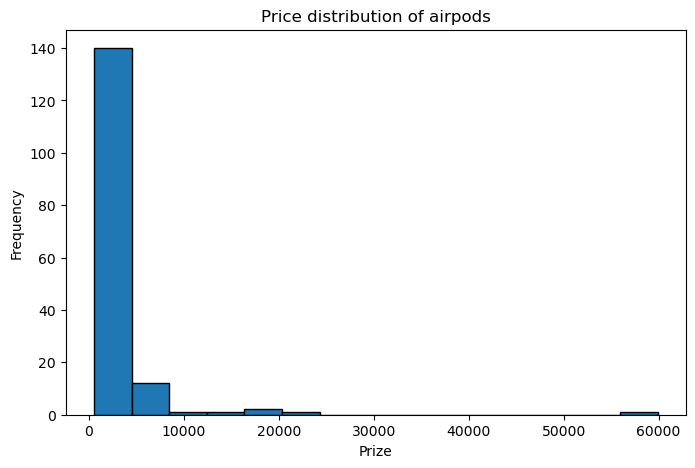

In [40]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'],bins=15, edgecolor='black')
plt.title("Price distribution of airpods")
plt.xlabel("Prize")
plt.ylabel("Frequency")
plt.show()

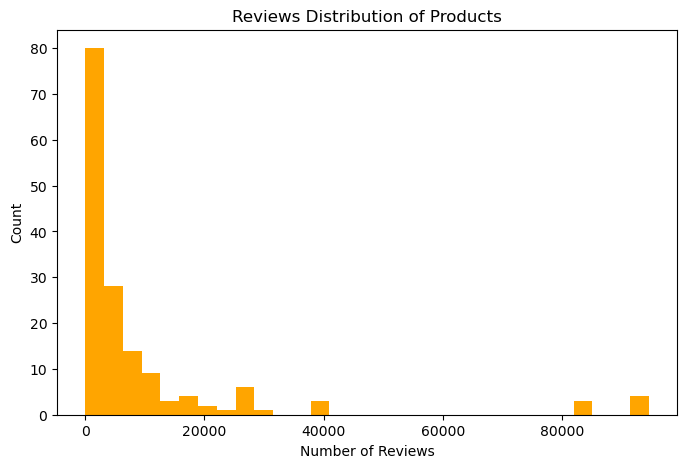

In [41]:
plt.figure(figsize=(8,5))
plt.hist(df['Number of Reviews'], bins=30, color="orange")
plt.title("Reviews Distribution of Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

## Popularity Analysis (By Reviews)

In [42]:
top_views = df.sort_values(by="Number of Reviews", ascending = False).head(10)

In [43]:
top_views

,Title,Price,Rating,Number of Reviews
63,boAt Airdopes 141 Pro Bud...,899.0,NaN,94510
124,boAt Airdopes 141 ANC(~32...,1399.0,NaN,94510
41,boAt Airdopes 141 Pro Bud...,799.0,NaN,94510
247,boAt Airdopes 141 ANC (~3...,1499.0,NaN,94510
42,"boAt Airdopes 141/8, Low ...",999.0,NaN,83183
110,boAt Airdopes 141 Elite A...,1499.0,NaN,83183
17,boAt Airdopes 141 Gen 2 (...,799.0,NaN,83183
68,GOBOULT Z40 True Wireless...,799.0,NaN,38040
299,Boult GOBOULT(Previously ...,1199.0,NaN,38040
223,Boult GOBOULT Z40 Pro wit...,1299.0,NaN,38040


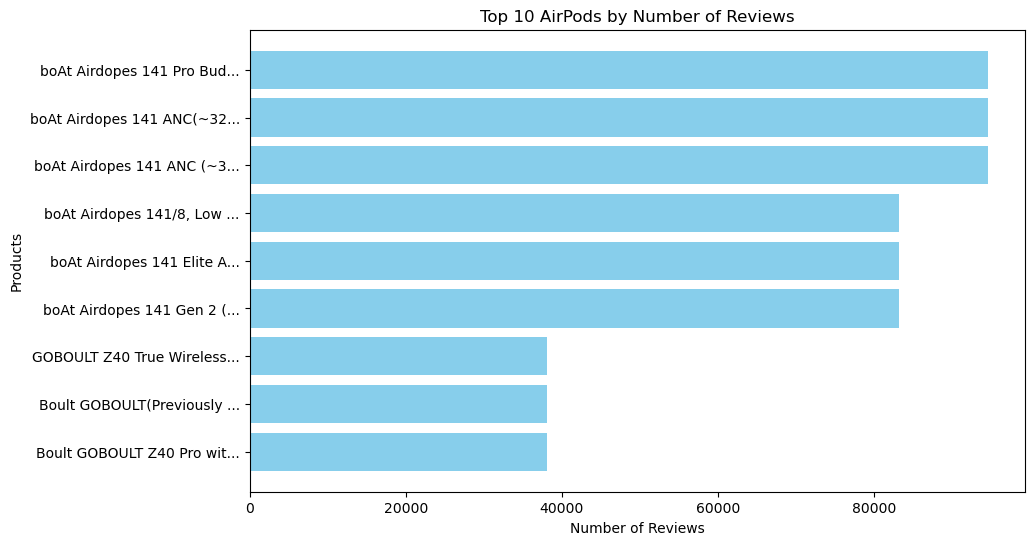

In [44]:
plt.figure(figsize=(10,6))
plt.barh(top_views['Title'], top_views['Number of Reviews'], color='skyblue')
plt.title("Top 10 AirPods by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Products")
plt.gca().invert_yaxis()
plt.show()

🔹 Insight: These top 10 products dominate customer preference and trust.
🔹 Insight: They are not always the most expensive ones, which shows customers value popularity and affordability.

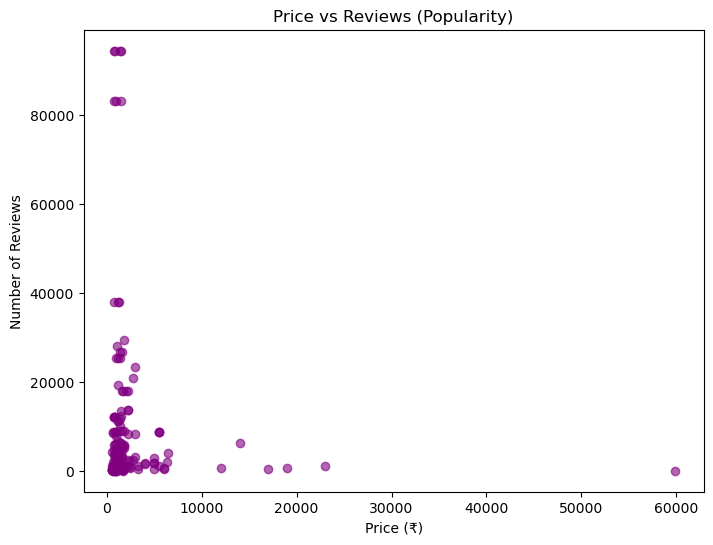

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(df['Price'], df['Number of Reviews'], alpha=0.6, color='purple')
plt.title("Price vs Reviews (Popularity)")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Reviews")
plt.show()

🔹 Insight: Price and number of reviews have weak correlation.
🔹 Insight: Higher price does not guarantee more reviews — affordable models often get more attention.

## Price Range Bucket

In [46]:
bins = [0, 2000, 5000, 10000, df['Price'].max()]
labels = ['<2000', '2000-5000', '5000-10000', '>10000']
df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest = True)

price_range_counts = df['Price_Range'].value_counts().sort_index()
avg_review_range = df.groupby('Price_Range')['Number of Reviews'].mean()

In [47]:
print("Product Count by Price Range:")
print(price_range_counts)

print("\nAverage Reviews by Price Range:")
print(round(avg_review_range,2))

Product Count by Price Range:
<2000         122
2000-5000      22
5000-10000      8
>10000          6
Name: Price_Range, dtype: int64

Average Reviews by Price Range:
Price_Range
<2000         11135.34
2000-5000      5906.64
5000-10000     4284.88
>10000         1496.67
Name: Number of Reviews, dtype: float64


🔹 Insight: Majority of products fall between ₹2000–₹5000.
🔹 Insight: Products in this price range also receive the highest average reviews, showing it's the sweet spot for customers.

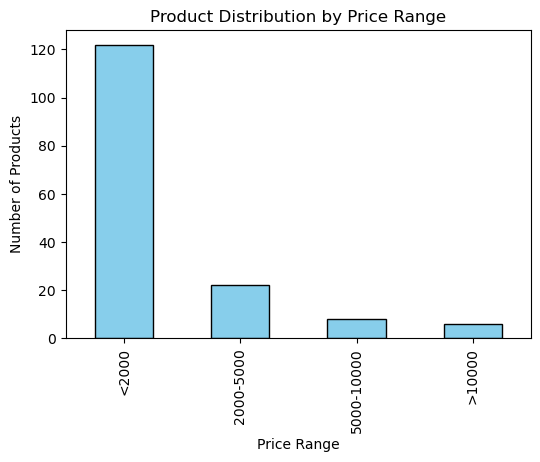

In [48]:
plt.figure(figsize=(6,4))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Product Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.show()

In [49]:
df['Value_Score'] = round((df['Number of Reviews'] / df['Price']),2)

# Top 5 products with best value
best_value = df.sort_values(by='Value_Score', ascending=False).head(5)
print("Top 5 Value-for-Money Products:")
print(best_value[['Title', 'Price', 'Number of Reviews', 'Value_Score']])

Top 5 Value-for-Money Products:
                            Title   Price  Number of Reviews  Value_Score
41   boAt Airdopes 141 Pro Bud...   799.0              94510       118.29
63   boAt Airdopes 141 Pro Bud...   899.0              94510       105.13
17   boAt Airdopes 141 Gen 2 (...   799.0              83183       104.11
42   boAt Airdopes 141/8, Low ...   999.0              83183        83.27
124  boAt Airdopes 141 ANC(~32...  1399.0              94510        67.56


Top Brands Summary:
            Avg_Price   Avg_Reviews  Count
Brand                                     
boAt      1432.333333  20858.190476     42
Noise     1499.000000   5439.400000     15
GOBOULT   1032.636364   8997.454545     11
OnePlus   4499.875000   9291.125000      8
JBL       4799.000000   7056.875000      8
realme    3027.571429  12223.285714      7
Apple    16682.428571   1901.428571      7
truke     1041.857143    488.285714      7
Boult     1084.714286  16967.857143      7
amazon     701.833333    398.166667      6


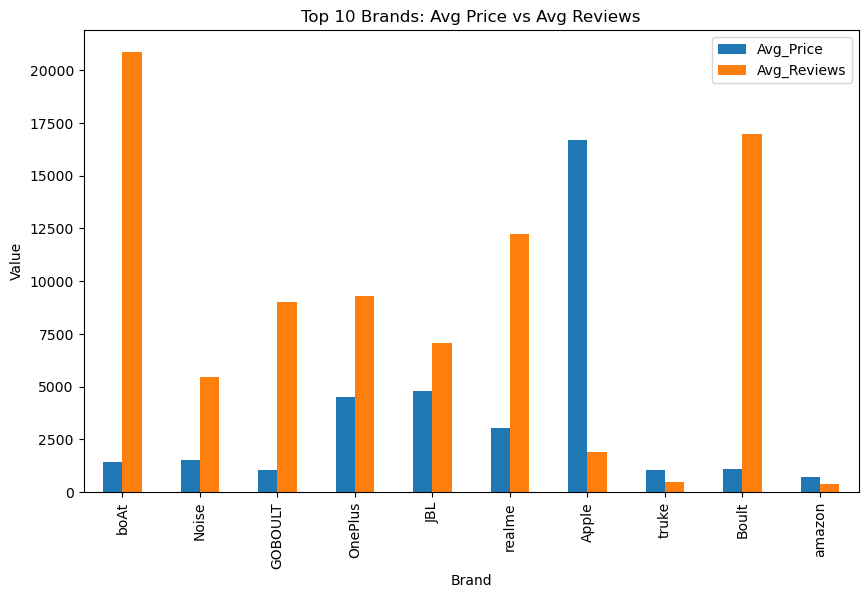

In [50]:
# Extract brand name (first word of Title as a simple assumption)
df['Brand'] = df['Title'].str.split().str[0]

# Average price & reviews per brand
brand_summary = df.groupby('Brand').agg(
    Avg_Price=('Price', 'mean'),
    Avg_Reviews=('Number of Reviews', 'mean'),
    Count=('Brand', 'size')
).sort_values(by='Count', ascending=False).head(10)

print("Top Brands Summary:")
print(brand_summary)

# Visualization
brand_summary[['Avg_Price', 'Avg_Reviews']].plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Brands: Avg Price vs Avg Reviews")
plt.ylabel("Value")
plt.show()

🔹 Insight: A few brands dominate the market with multiple listings.
🔹 Insight: Apple is strong in popularity, but other brands compete aggressively in the mid-range segment.

In [51]:
print("\nData Summary:")
print(round(df.describe(),2))


Data Summary:
          Price  Number of Reviews  Value_Score
count    158.00             158.00       158.00
mean    2539.11            9694.41         8.14
std     5520.11           19079.76        18.64
min      549.00               0.00         0.00
25%      931.50             593.00         0.44
50%     1299.00            2971.00         1.96
75%     1799.00            8681.00         7.18
max    59900.00           94510.00       118.29



Correlation Matrix:
                    Price  Number of Reviews
Price                1.0               -0.1
Number of Reviews   -0.1                1.0


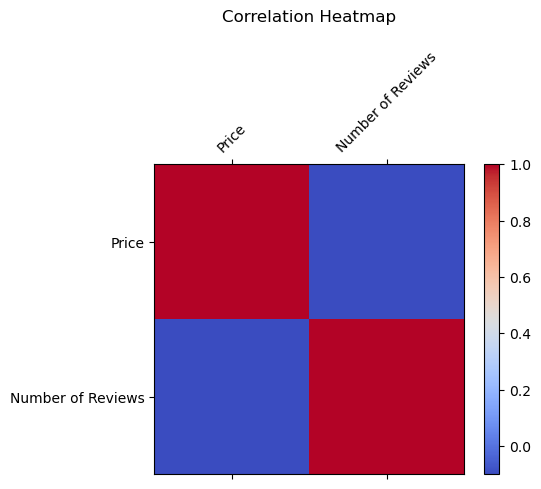

In [52]:
correlation = round(df[['Price', 'Number of Reviews']].corr(),2)
print("\nCorrelation Matrix:\n", correlation)

plt.figure(figsize=(5,4))
plt.matshow(correlation, cmap="coolwarm", fignum=1)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.title("Correlation Heatmap", pad=20)
plt.show()

Price Insights
🔹Most AirPods products are priced in the ₹2000–₹5000 range, which also receives the highest number of reviews.
🔹Premium AirPods priced up to ₹59,900 exist but represent only a small share of listings.

Popularity Trends
🔹Popularity (measured by number of reviews) is not strongly linked to price.
🔹Affordable and mid-range AirPods dominate in terms of customer engagement.

Customer Preference
🔹A handful of products gather thousands of reviews, while most others receive very few.
🔹This shows that customer attention is concentrated on a limited set of trusted models.

Value-for-Money Products
🔹Products with the best value score (reviews ÷ price) are often in the lower price range, proving that customers prefer budget-friendly models with strong social proof.

Brand Performance
🔹Apple leads the premium segment, but several other brands compete strongly in the mid-range market.
This suggests a clear split between brand-driven premium buyers and price-sensitive review-driven buyers.

In [58]:
df.to_excel("Cleaned_airpods_data.xlsx", index=False)